# Final Articles

There are 21 articles and 6 conference papers that made it into the review. For these 27 papers, we fetch all of the references and screen them following the same procedure as before.

In [1]:
import pandas as pd
import numpy as np
import itertools
from collections import defaultdict

In [21]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('presentation.mplstyle')
mpl.matplotlib_fname()

'/Users/kylehamilton/MyDocuments/ML-Labs/neuro-symbolic-AI/neuro-symbolic-ai-systematic-review/Scopus/matplotlibrc'

In [3]:
df=pd.read_csv('Data/Final_41 - Protocol.csv')

In [4]:
(df).columns

Index(['Doc type', 'Researcher', 'Title', 'Scopus Hash ID', 'DOI',
       'Journal/Conference', 'Year', 'Business Use Case',
       'Technical Application', 'Type of Learning', 'Key-intake',
       'Contribution', 'Authors Definition of NeSy', 'Symbolic terms',
       'Neural terms', 'NeSy Category', 'Kautz category', 'Datasets',
       'Model description', 'Evaluation Metrics', 'Reported Score',
       'Study Quality', 'Comments', 'MISC', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26'],
      dtype='object')

In [6]:
df=df[['Doc type', 'Researcher', 'Title', 'Scopus Hash ID', 'DOI',
       'Journal/Conference', 'Year', 'Business Use Case',
       'Technical Application', 'Type of Learning', 'Key-intake',
       'Contribution', 'Authors Definition of NeSy', 'Symbolic terms',
       'Neural terms', 'NeSy Category', 'Kautz category', 'Datasets',
       'Model description', 'Evaluation Metrics', 'Reported Score',
       'Study Quality', 'Comments', 'MISC']]

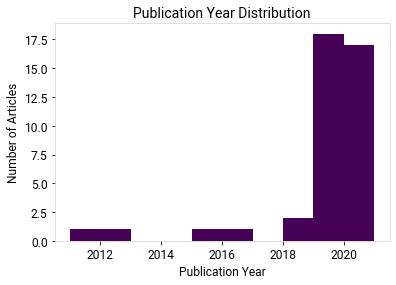

In [22]:
plt.hist(df['Year'])
plt.title('Publication Year Distribution')
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')
plt.show()

<AxesSubplot:title={'center':'Number of Articles per Use Case'}>

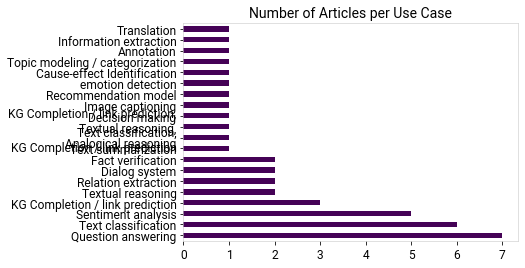

In [23]:
df['Business Use Case'].value_counts().plot(kind='barh', title="Number of Articles per Use Case")

<AxesSubplot:title={'center':'Number of articles per type of learning'}>

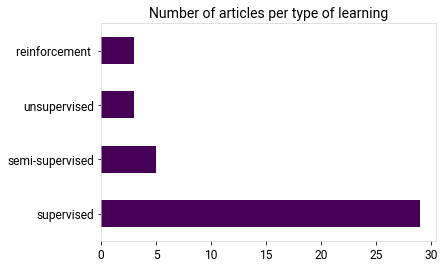

In [24]:
df['Type of Learning'].value_counts().plot(kind='barh', title="Number of articles per type of learning")

In [25]:
app_value_counts = df['Technical Application'].value_counts()

In [26]:
app_value_counts

classification                                           26
reasoning                                                 5
generative                                                4
recommendation                                            2
information extraction                                    2
reasoning,\ngenerative                                    1
classification,\nmulti-label (371 labels) probalities     1
Name: Technical Application, dtype: int64

In [27]:
app_value_counts['reasoning']+=app_value_counts['reasoning,\ngenerative']
app_value_counts['generative']+=app_value_counts['reasoning,\ngenerative']
app_value_counts['classification']+=app_value_counts['classification,\nmulti-label (371 labels) probalities']

In [28]:
app_value_counts.pop('reasoning,\ngenerative')
app_value_counts.pop('classification,\nmulti-label (371 labels) probalities')

1

In [29]:
app_value_counts

classification            27
reasoning                  6
generative                 5
recommendation             2
information extraction     2
Name: Technical Application, dtype: int64

<AxesSubplot:title={'center':'Number of articles per application'}>

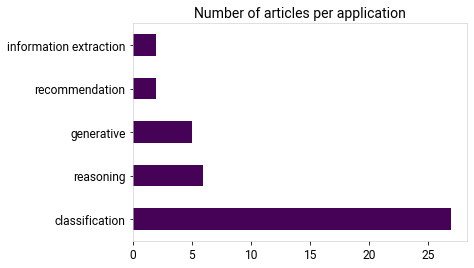

In [30]:
app_value_counts.plot(kind='barh', title="Number of articles per application")

In [31]:
nesy_value_counts = df['NeSy Category'].value_counts()

In [32]:
nesy_value_counts

sequential     17
compiled       11
cooperative     7
nested          6
Name: NeSy Category, dtype: int64

<AxesSubplot:title={'center':'Number of articles per NeSy Category'}>

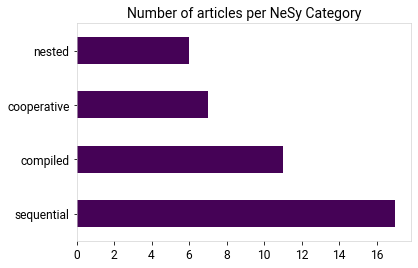

In [33]:
nesy_value_counts.plot(kind='barh', title="Number of articles per NeSy Category")

<AxesSubplot:title={'center':'Number of articles per Kautz category'}>

/Users/kylehamilton/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8594 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kylehamilton/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8594 missing from current font.
  font.set_text(s, 0, flags=flags)


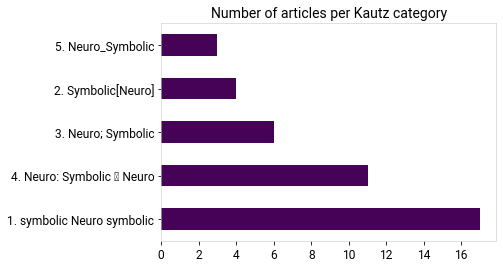

In [34]:
df['Kautz category'].value_counts().plot(kind='barh', title="Number of articles per Kautz category")

In [35]:
df['Symbolic terms'].unique()

array([' deduction,\ndependency parsing,\nrule based',
       'semantic enrichement', 'first order logic (FOL)',
       'first order logic (FOL),\nknowledge graph (KG),\nlogic tensor network (LTN)',
       'ontology,\nknowledge graph (KG)', 'sememe',
       'rule based,\nsemantic enrichement',
       'symbolic learner,\nsymbolic representations,\nConceptNet KG',
       'ontology', 'logic',
       'statistical relational learning (SLR, RML),\nfuzzy logic,\nFOL,\nTransductive learning,\ngrounding,\npropositionalization,\nsemantic enrichment',
       'FOL,\nHuffman tree', 'semantic enrichement,\ndependency parsing',
       'commonsense knowledge,\ngraph represenatation',
       'Markov Decision Process (MDP)', 'knowledge graph (KG)',
       'graph representation, \nposition reasoning',
       'Sequencial decision making,\npredicate logic,\nrelational logic,\nrule based,\nrule induction,\ncognitive linguistics',
       'fuzzy logic,\nfuzzy neural network (FNN),\nlogical connectives',
     

In [36]:
df['Neural terms'].unique()

array(['recurrent neural network (RNN)', 'logic tensor network (LTN)',
       'recurrent neural network (RNN),\nconvolutional neural network (CNN)',
       'graph neural network (GNN)', 'neural network (NN)', 'SVM',
       'transformer,\nneuroevolution (NE)',
       'recursive neural knowledge network (RNKN),\nrecursive neural network (RNN)',
       'reinforcement learning (RL)',
       'reinforcement learning (RL),\nMemory Network,\nneural network (NN)\n',
       'convolutional neural network (CNN),\nrecurrent neural network (RNN),\ndeep belief network (DBN)',
       'transformer',
       'convolutional neural network (CNN),\nrecurrent neural network (RNN)',
       'convolutional neural network (CNN),\nneural network (NN)',
       'convolutional neural network (CNN)',
       'attention network (BERT),\ngraph neural network (GNN)',
       'curriculum learning,\nrecurrent neural network (RNN),\nreinforcement learning (RL)',
       'recursive neural network (RNN),\nTensor Product Represe

<AxesSubplot:title={'center':'study quality'}, ylabel='Frequency'>

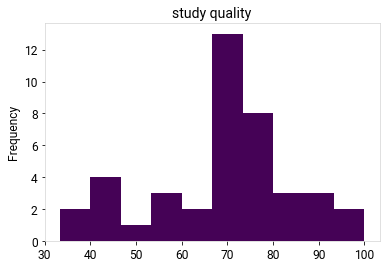

In [37]:
df['Study Quality'].str.rstrip('%').astype('float').plot(kind='hist',title="study quality")

In [38]:
df['Datasets'].value_counts()

Private                                                                                                                                                                               3
NLTK                                                                                                                                                                                  1
DBpedia                                                                                                                                                                               1
AffectiveText, ISEAR, and Fairy Tales, Facebook posts                                                                                                                                 1
MDG-C, MDG-D                                                                                                                                                                          1
NOT SPECIFIED                                                                   

In [59]:
# symbolic terms
sym_terms=df['Symbolic terms']
sym_list=[[i.strip(' ').rstrip(',') for i in str(s).split("\n")] for s in sym_terms]

In [60]:
sym_list

[['deduction', 'dependency parsing', 'rule based'],
 ['semantic enrichement'],
 ['first order logic (FOL)'],
 ['first order logic (FOL)',
  'knowledge graph (KG)',
  'logic tensor network (LTN)'],
 ['ontology', 'knowledge graph (KG)'],
 ['semantic enrichement'],
 ['sememe'],
 ['rule based', 'semantic enrichement'],
 ['symbolic learner', 'symbolic representations', 'ConceptNet KG'],
 ['ontology'],
 ['semantic enrichement'],
 ['logic'],
 ['statistical relational learning (SLR, RML)',
  'fuzzy logic',
  'FOL',
  'Transductive learning',
  'grounding',
  'propositionalization',
  'semantic enrichment'],
 ['FOL', 'Huffman tree'],
 ['semantic enrichement', 'dependency parsing'],
 ['commonsense knowledge', 'graph represenatation'],
 ['Markov Decision Process (MDP)'],
 ['knowledge graph (KG)'],
 ['graph representation', 'position reasoning'],
 ['Sequencial decision making',
  'predicate logic',
  'relational logic',
  'rule based',
  'rule induction',
  'cognitive linguistics'],
 ['fuzzy logic

In [40]:
neu_terms=df['Neural terms']
neu_list=[[i.rstrip(',') for i in str(s).split("\n")] for s in neu_terms]

In [57]:
neu_list

[['recurrent neural network (RNN)'],
 ['recurrent neural network (RNN)'],
 ['recurrent neural network (RNN)'],
 ['logic tensor network (LTN)'],
 ['recurrent neural network (RNN)', 'convolutional neural network (CNN)'],
 ['graph neural network (GNN)'],
 ['neural network (NN)'],
 ['SVM'],
 ['transformer', 'neuroevolution (NE)'],
 ['neural network (NN)'],
 ['SVM'],
 ['recurrent neural network (RNN)'],
 ['SVM'],
 ['recursive neural knowledge network (RNKN)',
  'recursive neural network (RNN)'],
 ['SVM'],
 ['SVM'],
 ['reinforcement learning (RL)'],
 ['recurrent neural network (RNN)'],
 ['neural network (NN)'],
 ['reinforcement learning (RL)', 'Memory Network', 'neural network (NN)', ''],
 ['convolutional neural network (CNN)',
  'recurrent neural network (RNN)',
  'deep belief network (DBN)'],
 ['neural network (NN)'],
 ['transformer'],
 ['convolutional neural network (CNN)', 'recurrent neural network (RNN)'],
 ['graph neural network (GNN)'],
 ['convolutional neural network (CNN)', 'neural 

In [61]:
sym_set=set(sum(sym_list,[]))

In [69]:
neu_set=set(sum(neu_list,[]))

In [71]:
neu_set=neu_set-(set(['']))

In [72]:
neu_set

{'Memory Network',
 'SVM',
 'Tensor Product Representation',
 'attention network',
 'attention network (BERT)',
 'convolutional neural network (CNN)',
 'curriculum learning',
 'deep belief network (DBN)',
 'graph neural network (GNN)',
 'logic tensor network (LTN)',
 'neural network (NN)',
 'neuroevolution (NE)',
 'recurrent neural network (RNN)',
 'recursive neural knowledge network (RNKN)',
 'recursive neural network (RNN)',
 'reinforcement learning (RL)',
 'transformer'}

In [73]:
sym_set

{'ConceptNet KG',
 'FOL',
 'Huffman tree',
 'Markov Decision Process (MDP)',
 'Neutrosophy',
 'Sequencial decision making',
 'Tensor Product Representation',
 'Transductive learning',
 'binding problem',
 'case based reasoning (CBR)',
 'cognitive linguistics',
 'commonsense knowledge',
 'constituency parsing',
 'deduction',
 'dependency parsing',
 'domain specific language (DSL)',
 'first order logic (FOL)',
 'fuzzy logic',
 'fuzzy neural network (FNN)',
 'fuzzy rule',
 'fuzzy rules',
 'graph reasoning',
 'graph represenatation',
 'graph representation',
 'grounding',
 'knowledge graph (KG)',
 'logic',
 'logic tensor network (LTN)',
 'logical connectives',
 'mamdani fuzzy system (MFS)',
 'ontology',
 'position reasoning',
 'predicate logic',
 'program synthesis',
 'propositionalization',
 'relational logic',
 'rule based',
 'rule induction',
 'semantic enrichement',
 'semantic enrichment',
 'semantic net',
 'semantic parsing',
 'sememe',
 'statistical relational learning (SLR, RML)',
 

In [74]:
tup_dict=defaultdict(int)
for i in range(len(sym_list)):
    lists = list(itertools.product(sym_list[i],neu_list[i]))
    
    for j in lists:
        tup_dict[j]+=1


In [75]:
tup_dict

defaultdict(int,
            {('deduction', 'recurrent neural network (RNN)'): 1,
             ('dependency parsing', 'recurrent neural network (RNN)'): 1,
             ('rule based', 'recurrent neural network (RNN)'): 3,
             ('semantic enrichement', 'recurrent neural network (RNN)'): 2,
             ('first order logic (FOL)', 'recurrent neural network (RNN)'): 1,
             ('first order logic (FOL)', 'logic tensor network (LTN)'): 1,
             ('knowledge graph (KG)', 'logic tensor network (LTN)'): 1,
             ('logic tensor network (LTN)', 'logic tensor network (LTN)'): 1,
             ('ontology', 'recurrent neural network (RNN)'): 2,
             ('ontology', 'convolutional neural network (CNN)'): 1,
             ('knowledge graph (KG)', 'recurrent neural network (RNN)'): 2,
             ('knowledge graph (KG)', 'convolutional neural network (CNN)'): 1,
             ('semantic enrichement', 'graph neural network (GNN)'): 1,
             ('sememe', 'neural networ

In [76]:
d=defaultdict(dict)

for i in sym_set:
    inner_dict=defaultdict(dict)
    for j in neu_set:
        inner_dict[j]=tup_dict[(i,j)]
    d[i]=inner_dict
    
assd=pd.DataFrame(d)

In [77]:
assd

,rule based,logical connectives,Huffman tree,binding problem,Sequencial decision making,graph reasoning,graph representation,dependency parsing,propositionalization,predicate logic,...,semantic parsing,ontology,position reasoning,Transductive learning,relational logic,symbolic processing,cognitive linguistics,knowledge graph (KG),fuzzy logic,case based reasoning (CBR)
Memory Network,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
logic tensor network (LTN),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
curriculum learning,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
neural network (NN),1,0,0,0,1,0,1,0,0,1,...,0,1,1,0,1,0,1,0,2,0
neuroevolution (NE),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
graph neural network (GNN),0,0,0,0,0,1,2,0,0,0,...,1,0,0,0,0,0,0,1,0,0
reinforcement learning (RL),1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
Tensor Product Representation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SVM,2,0,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
recursive neural network (RNN),0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


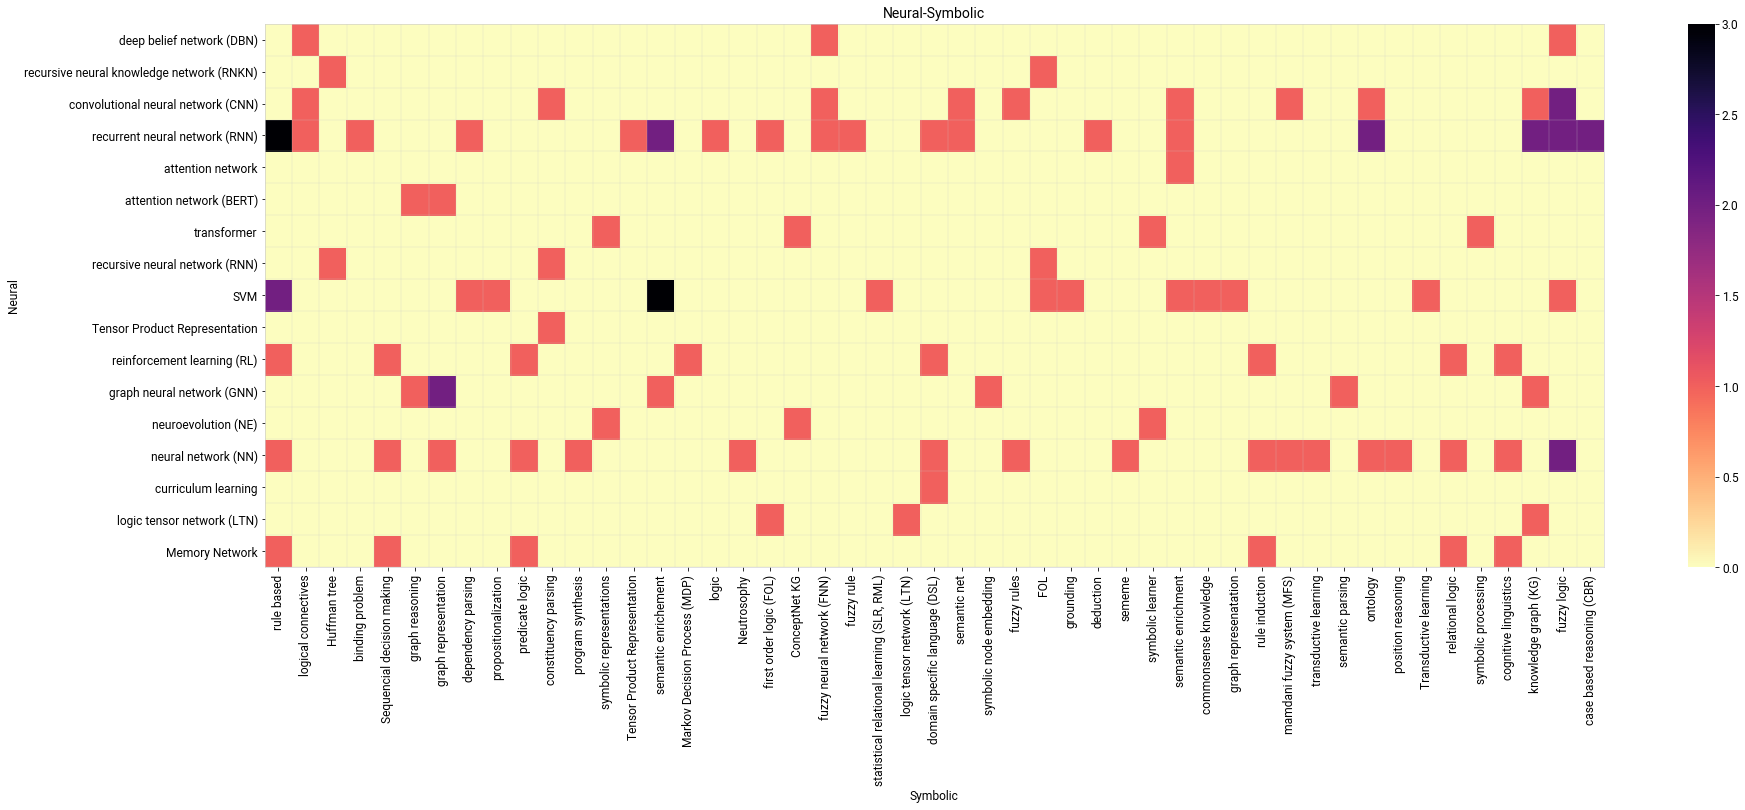

In [78]:
plt.style.use('presentation.mplstyle')
mpl.matplotlib_fname()
fig, ax = plt.subplots(figsize=(30, 10))
color_map = plt.cm.get_cmap('magma')
reversed_color_map = color_map.reversed()

plt.hlines(y=np.arange(0, len(assd.index), 1), xmin=np.full(len(assd.index),0), xmax=np.full(len(assd.index),len(assd.columns)), color="#cccccc", linewidth=.25)
plt.vlines(x=np.arange(0, len(assd.columns), 1), ymin=np.full(len(assd.columns),0), ymax=np.full(len(assd.columns),len(assd.index)), color="#cccccc",linewidth=.25)
plt.yticks(np.arange(0.5, len(assd.index), 1), assd.index)
plt.xticks(np.arange(0.5, len(assd.columns), 1), assd.columns, rotation=90)
plt.ylabel("Neural")
plt.xlabel("Symbolic")
plt.title("Neural-Symbolic")

graph=plt.pcolor(assd, cmap=reversed_color_map)
cb = fig.colorbar(graph)
# cb.set_label('Support', rotation=0, va='bottom')
cb.outline.set_visible(False)
plt.show()

In [50]:
df.columns

Index(['Doc type', 'Researcher', 'Title', 'Scopus Hash ID', 'DOI',
       'Journal/Conference', 'Year', 'Business Use Case',
       'Technical Application', 'Type of Learning', 'Key-intake',
       'Contribution', 'Authors Definition of NeSy', 'Symbolic terms',
       'Neural terms', 'NeSy Category', 'Kautz category', 'Datasets',
       'Model description', 'Evaluation Metrics', 'Reported Score',
       'Study Quality', 'Comments', 'MISC'],
      dtype='object')

# STOP HERE
The rest has to do with secondary studies, ie rerefence papers. We are not reviewing these.

# Get all the references for these 41 papers

In [396]:
# let's get the abstracts from scopus of all the articles we included. 
# We'll do a search on scopus for EID and DOI
# 'Scopus Hash ID', 'DOI',

df[['Scopus Hash ID','DOI']]

,Scopus Hash ID,DOI
0,ACDMDN8W,10.1108/IJWIS-11-2020-0067
1,BAMGPUCX,10.1109/ACCESS.2021.3053917
2,2PNFHS7L,10.1016/j.neucom.2021.02.021
3,JN4IZETG,10.1007/s10994-021-05968-x
4,KTEHK4MZ,10.1016/j.neucom.2020.12.040
5,RDSQSBN7,10.1109/TASLP.2021.3082295
6,3YFVRRKE,10.1109/ACCESS.2020.2972751
7,4EF4BXD9,10.1007/s12065-019-00301-x
8,JGU2SECC,10.1016/j.artmed.2019.101772
9,74QZV8X9,10.1109/ACCESS.2020.3019586


The two studies missing a DOI:
* 2-s2.0-85106687657
* 2-s2.0-85105153943

Scopus search which makes references(25)scopus.csv:
<pre>
DOI ("10.1007/978-3-030-48279-4_55" OR "10.1016/j.neunet.2016.09.001"  OR  "10.1108/IJWIS-11-2020-0067"  OR  "10.1007/s10994-021-05968-x"  OR 
"10.1016/j.eswa.2016.01.007"  OR "10.1016/j.neucom.2020.12.040"  OR  "10.1007/s10462-010-9188-4"  OR  "10.1016/j.patrec.2019.04.024"  OR  
"10.1016/j.neucom.2021.02.021"  OR "10.1109/ACCESS.2020.2972751"  OR  "10.1016/j.neunet.2018.06.012"  OR  "10.1016/j.artmed.2019.101772"  OR 
"10.1007/978-3-030-61609-0_51"  OR "10.1109/ACCESS.2019.2948081"  OR  "10.1109/TASLP.2021.3082295"  OR  "10.1109/ACCESS.2020.3019586"  OR  
"10.1016/j.artint.2015.08.011"  OR "10.1007/978-3-030-82147-0_34"  OR  "10.1016/j.neucom.2017.10.010"  OR  "10.1109/ACCESS.2021.3053917"  OR
"10.1007/s13218-019-00601-5"  OR "10.1007/s12065-019-00301-x"  OR  "10.1145/3453483.3454047" OR "10.1016/j.neunet.2012.02.013" OR
"10.1007/s11042-019-08125-8")  

OR  EID ( "2-s2.0-85106687657"  OR  "2-s2.0-85105153943" ) 
</pre>

In [349]:
# get the articles
all_papers=pd.read_csv('scopus(27).csv')

In [350]:
all_papers=all_papers[['EID','Title','References']]

In [351]:
len(all_papers) #.columns
# should be 25!

27

In [352]:
len(all_papers['Title'].unique())
# should be 25!

27

In [353]:
all_papers=all_papers.drop_duplicates(subset="Title")

In [354]:
all_papers.columns

Index(['EID', 'Title', 'References'], dtype='object')

In [355]:
# references are separated by a semi-colon. Create a list by splitting on ;
all_papers['References']=all_papers['References'].str.split(pat=";")

In [356]:
# put each citation in its own row
all_papers=all_papers.explode('References')

In [357]:
all_papers=all_papers.reset_index(drop=True)

In [358]:
all_papers.to_csv('references(27)exploded.csv')

In [359]:
# add scopus data to references

refs_df = pd.read_csv('references(27)scopus.csv')

In [360]:
# extract just the relevant fields
refs_df=refs_df[['Authors','Title','Abstract','DOI','Year','Cited by','Author Keywords',
         'Index Keywords','EID']]

<AxesSubplot:>

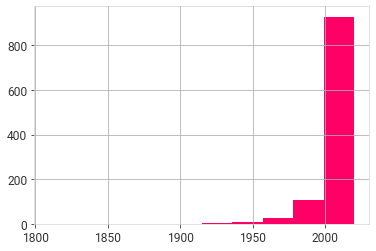

In [361]:
refs_df.query('Year > 0')['Year'].hist()

In [362]:
years=refs_df.query('Year > 0')['Year'].value_counts()
years_arr=list(zip(years.index, years.values))
sorted(years_arr, key=lambda t: -t[0])

[(2020, 61),
 (2019, 93),
 (2018, 99),
 (2017, 103),
 (2016, 76),
 (2015, 77),
 (2014, 54),
 (2013, 55),
 (2012, 29),
 (2011, 33),
 (2010, 30),
 (2009, 25),
 (2008, 35),
 (2007, 16),
 (2006, 25),
 (2005, 20),
 (2004, 17),
 (2003, 21),
 (2002, 17),
 (2001, 15),
 (2000, 14),
 (1999, 14),
 (1998, 12),
 (1997, 12),
 (1996, 9),
 (1995, 15),
 (1994, 8),
 (1993, 1),
 (1992, 5),
 (1991, 10),
 (1990, 11),
 (1989, 5),
 (1988, 2),
 (1987, 5),
 (1986, 6),
 (1985, 1),
 (1983, 2),
 (1982, 1),
 (1980, 2),
 (1979, 1),
 (1975, 4),
 (1974, 4),
 (1973, 1),
 (1972, 2),
 (1970, 1),
 (1969, 3),
 (1968, 3),
 (1967, 2),
 (1966, 1),
 (1965, 2),
 (1962, 2),
 (1958, 1),
 (1957, 1),
 (1956, 2),
 (1953, 1),
 (1952, 1),
 (1949, 1),
 (1947, 1),
 (1943, 1),
 (1937, 1),
 (1931, 1),
 (1926, 1),
 (1810, 1)]

In [363]:
# Extracts ref titles from the references
all_papers['ref_title']=all_papers['References'].str.extract('(.*?)\(\d+\)', expand=True) #.reset_index(level=0, drop=True)

In [364]:
pd.set_option('display.max_colwidth', None)
# all_papers['ref_title']

In [365]:
# split on comma and get last element. that's the title.
all_papers['ref_title']=all_papers['ref_title'].str.split(pat=",").str[-1]

In [366]:
all_papers['ref_title']=all_papers['ref_title'].str.strip()

In [367]:
# join on title with scopus reference df - refs_df
all_papers

,EID,Title,References,ref_title
0,2-s2.0-85106687657,Just Add Functions: A Neural-Symbolic Language Model,"Ahn, S., Choi, H., Pärnamaa, T., Bengio, Y., (2017) A neural knowledge language model, , CoRR abs/1608.00318",
1,2-s2.0-85106687657,Just Add Functions: A Neural-Symbolic Language Model,"Bengio, Y., Schwenk, H., Senecal, J.-S., Morin, F., Gauvain, J.-L., (2006) Neural probabilistic language models",
2,2-s2.0-85106687657,Just Add Functions: A Neural-Symbolic Language Model,"Besold, T. R., d'Avila Garcez, A. S., Bader, S., Bowman, H., Domingos, P. M., Hitzler, P., Kühnberger, K.-U., Zaverucha, G., (2017) Neural-symbolic learning and reasoning: A survey and interpretation, , ArXiv abs/1711.03902",
3,2-s2.0-85106687657,Just Add Functions: A Neural-Symbolic Language Model,"Chelba, C., Mikolov, T., Schuster, M., Ge, Q., Brants, T., Koehn, P., One billion word benchmark for measuring progress in statistical language modeling (2013) INTERSPEECH",One billion word benchmark for measuring progress in statistical language modeling
4,2-s2.0-85106687657,Just Add Functions: A Neural-Symbolic Language Model,"Firth, J. R., (1957) A synopsis of linguistic theory 1930-55, pp. 1-32. , 1952 59",
...,...,...,...,...
1149,2-s2.0-85106847388,Sentence-Level Classification Using Parallel Fuzzy Deep Learning Classifier,"(2020) COVID-19-Sentiments India[20/03/20-31/05/20], , https://kaggle.com/abhaydhiman/covid19-sentiments, Accessed: Dec. 30",
1150,2-s2.0-85106847388,Sentence-Level Classification Using Parallel Fuzzy Deep Learning Classifier,"Gangadharan, V., Gupta, D., Amritha, L., Athira, T.A., Paraphrase detection using deep neural network based word embedding techniques (2020) Proc. 4th Int. Conf. Trends Electron. Informat. (ICOEI), pp. 517-521. , Jun",Paraphrase detection using deep neural network based word embedding techniques
1151,2-s2.0-85106847388,Sentence-Level Classification Using Parallel Fuzzy Deep Learning Classifier,"Pennington, J., Socher, R., Manning, C., Glove: Global vectors for word representation (2014) Proc. Conf. Empirical Methods Natural Lang. Process. (EMNLP), pp. 1532-1543",Glove: Global vectors for word representation
1152,2-s2.0-85106847388,Sentence-Level Classification Using Parallel Fuzzy Deep Learning Classifier,"Mikolov, T., Sutskever, I., Chen, K., Corrado, G., Dean, J., (2013) Distributed Representations of Words and Phrases and Their Compositionality, , http://arxiv.org/abs/1310.4546, arXiv:1310.4546",


In [368]:
new_df = pd.merge(all_papers, refs_df,  how='left', left_on='ref_title', right_on = 'Title')


In [292]:
len(new_df[new_df['Title_y'].notnull()])

529

In [369]:
new_df.to_csv('references(27)merged.csv', index=False)

In [370]:
len(new_df)

1169

In [371]:
new_df.columns

Index(['EID_x', 'Title_x', 'References', 'ref_title', 'Authors', 'Title_y',
       'Abstract', 'DOI', 'Year', 'Cited by', 'Author Keywords',
       'Index Keywords', 'EID_y'],
      dtype='object')

In [381]:
qq_df = pd.read_csv('qq(27).csv')

In [382]:
qq_df = qq_df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9','Q10']]

In [383]:
qq_df.describe()

,Q1,Q2,Q3,Q4,Q6,Q7,Q8,Q9,Q10
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,27.000000,27.000000
mean,0.826923,0.846154,0.788462,0.846154,0.865385,0.596154,0.100000,0.185185,0.240741
std,0.314398,0.308844,0.378763,0.339683,0.301917,0.490290,0.288675,0.395847,0.401209
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.625000,1.000000,0.625000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Annotated reference papers
In the first screening, the papers have been marked for inclusion based on title/abstract

In [401]:
ref_ann_df = pd.read_csv('references(27)merged_annotated.csv')

In [402]:
ref_ann_df.columns

Index(['EID_x (of the original paper)', 'Title_x (of the original paper)',
       'References (from the original 27 papers)',
       'ref_title (extracted using regex from References from the original papers)',
       'Abstract', ' keep (NeSy)', 'keep (background)', 'Kyle', 'Aparna',
       'Title_y (from scopus)', 'EID_y', 'DOI', 'Unnamed: 12', 'Year',
       'Cited by', 'Authors', 'Author Keywords', 'Index Keywords'],
      dtype='object')